<a href="https://colab.research.google.com/github/Elwing-Chou/ml0602/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


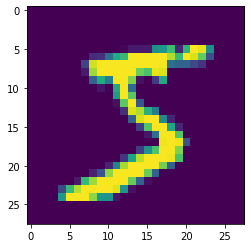

In [6]:
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0])